# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinationsPossible number of cities  1500.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Save config information.
#API call: http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={APIKEY}
#API call: api.openweathermap.org/data/2.5/weather?q={city name} &q = after this are parameters
url = "http://api.openweathermap.org/data/2.5/weather?"

In [ ]:
#Ins_OpenWeatherDataFrame
#set up lists to hold reponse info
city_lon = []
city_lat =[]
city_temp = []
city_clouds = []
city_humid = []
city_windy = []
city_name = []
# use restart to stop loop
#counter used for record
counter = 1
test_cities = ['san francisco', 'nashville', 'tokyo']
#for city in test_cities:

# Loop through the list of cities and perform a request for data on each. use try except because not all cities will have all elements
for city in cities:
    try:
    # Build partial query URL
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_url).json()
        lon.append(response['coord']['lon'])
        city_lat.append(response['coord']['lat'])
        city_temp.append(response['main']['temp'])
        city_clouds.append(response['clouds']['all'])
        city_humid.append(response['main']['humidity'])
        city_windy.append(response['wind']['speed'])
        city_name.append(response['name'])
        print(f"Processing Record {counter} | {city}")
        counter = counter + 1
        
        #pause python execution for one second
        #time.sleep(1)
        
    #exception block will occur if there missing data in lists
    except:
        print("City not found. Skipping...")

         

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [14]:
# display keys
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [15]:
pprint (response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 35.68, 'lon': 139.76},
 'dt': 1577480706,
 'id': 1850147,
 'main': {'feels_like': 22.98,
          'humidity': 45,
          'pressure': 1019,
          'temp': 40.26,
          'temp_max': 44.01,
          'temp_min': 32},
 'name': 'Tokyo',
 'sys': {'country': 'JP',
         'id': 8074,
         'sunrise': 1577483367,
         'sunset': 1577518474,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 21.92}}


In [16]:
response ['main']['temp']

40.26

In [17]:
print(f"The temperature is: {response ['main']['temp']}")

The temperature is: 40.26


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# create a data frame
weather_dict = {
    "name": city_name,
    "lat": city_lat,
    "lon": city_lon,   
    "temp": city_temp,
    "clouds": city_clouds,
    "humidity": city_humid, 
    "windy": city_windy
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,name,lat,lon,temp,clouds,humidity,windy
0,San Francisco,1.17,-76.88,73.40,40,64,6.93
1,Nashville,36.16,-86.77,62.73,90,77,5.82
2,Tokyo,35.68,139.76,40.26,20,45,21.92


In [19]:
# Identify incomplete rows
weather_data.count()

name        3
lat         3
lon         3
temp        3
clouds      3
humidity    3
windy       3
dtype: int64

In [20]:
#save to csv
weather_data.to_csv("weatherpy.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

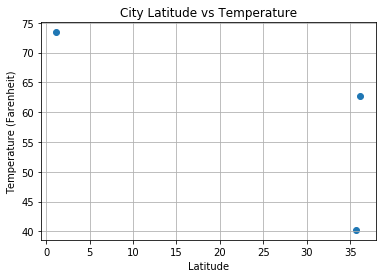

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

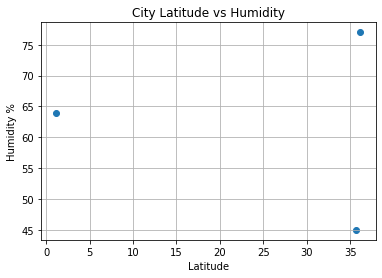

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

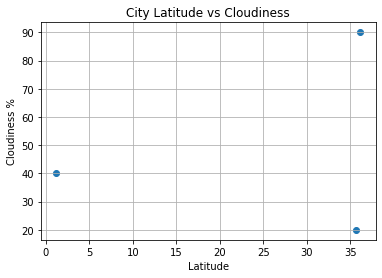

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

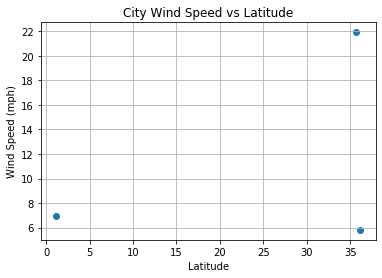

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windy"], marker="o")

# Incorporate the other graph properties
plt.title("City Wind Speed vs Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_SpeedInWorldCities.png")

# Show plot
plt.show()

Written description of three observable trends based on the data:

1. Zero degrees (0°) latitude is the equator. The temperatures are the hottest for the cities nearest the equator and decreases as you move North away from the equator. Southern latitudes are expressed as negative number where -90° is at the South Pole. However, temperatures do not show the same decrease in temperature as you move South away from the equator.
2. Latitude has no impact on cloudiness. 
3. Wind speed ranges between 0 and 10 mph for most cities in the world.
